## Question 1
### (a)
If we do not know how many minima are there in the interval, actually placing the point in the smaller interval would be  more beneficial. However, for any continuous function, as we continue bisectioning, we will finally come to a stage where there is only one minimum in the interval. Now if we assume there is only one minimum with equal possibility at any point between the interval, then the chance that minimum is at larger interval is larger, and thus putting the point in the larger interval is more advantageous.

### (b)
Since F(e)<F(b) when putting e=0.25, the new interval becomes [a,e,b], and the search space is reduced by 1/3.

### (c)
Placing the next point at f=0.375. Since F(f)>F(e), the new interval becomes [e,f,b]. When compared to the result after step 2, the interval is further decreased by 1/2.

### (d)
![title](HW1-p1.png)

### (e)
The average size of step 2:

$(1/2\times(1/2+3/4)+3/4\times(2/3+2/3))\times1/4=0.40625$

The average size of step 3:

$(1/2\times[1/2\times(1/2+3/4)+3/4\times(2/3+2/3)]+3/4\times[2/3\times(1/2+3/4)+2/3\times(1/2+3/4)])\times1/8=0.2578$

### (f)
In Golden section, each step decrease the interval by 0.382, no matter where you put the point.

<table>
<tr>
<th>Optimization method</th>
<th>Bisection</th>
<th>Golden Section</th>
<th>Ratio</th>
</tr>
<tr>
<th>Step 1</th>
<th>0.625</th>
<th>0.618</th>
<th>1.01</th>
</tr>
<tr>
<th>Step 2</th>
<th>0.406</th>
<th>0.382</th>
<th>1.06</th>
</tr>
<tr>
<th>Step 3</th>
<th>0.258</th>
<th>0.236</th>
<th>1.09</th>
</tr>
</table>


## Question 2
### (a)


Next point for visit with stepsize=0.1:

In [1]:
from pylab import *
def func(X):
    x,y=X
    return x**4-x**2+y**2+2*x*y-2

def first_derivative(X):
    x,y=X
    return np.array([4*x**3 - 2*x + 2*y,2*y + 2*x])

def second_derivative(X):
    x,y=X
    return np.array([[12*x**2-2,2],[2,2]])

original_point=np.array([1.5,1.5])
new_point=original_point-0.1*first_derivative(original_point)
print(new_point,func(new_point))
print(func(new_point)<func(original_point))

[0.15 0.9 ] -0.9419937500000004
True


That means by taking a ministep along the opposite direction of the gradient, the function evaluation decreases. So it is a good step. In the next step, the stepsize can increase by 20%.

### (b)
Timing decorator:

In [2]:
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print('func:%r took: %2.4f sec' % (f.__name__,  te-ts))
        return result

    return timed

The steepest descent code:

In [3]:
import numpy.linalg as LA
@timeit
def steepest_descent(func,first_derivate,starting_point,stepsize,tol):
    deriv=first_derivate(starting_point)
    count=0
    visited=[]
    while LA.norm(deriv)>tol and count<1e6:
        new_point=starting_point-stepsize*deriv
        if func(new_point)<func(starting_point):
            visited.append(starting_point)
            starting_point=new_point
            deriv=first_derivate(starting_point)
            stepsize*=1.2
            count+=1
            
        else:
            stepsize/=2
            count+=1
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited)}

In [4]:
res=steepest_descent(func,first_derivative,original_point,0.1,1e-5)
print(res['path'][-1], func(res['path'][-1]))

func:'steepest_descent' took: 0.0020 sec
[-0.99999982  0.99999455] -2.9999999999721534


Function for drawing path:

In [5]:
# %matplotlib notebook
%matplotlib inline
def draw_path(func,path,x_min=-2,x_max=2,y_min=-2,y_max=2):
    a=np.linspace(x_min,x_max,100)
    b=np.linspace(y_min,y_max,100)
    x,y=np.meshgrid(a,b)
    z=func((x,y))
    fig,ax=plt.subplots()
    my_contour=ax.contour(x,y,z,50)
    plt.colorbar(my_contour)
    ax.plot(path[:,0],path[:,1])

41


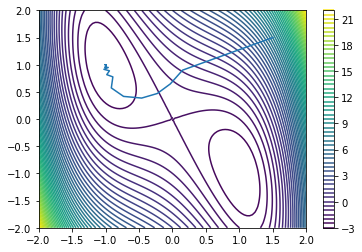

In [6]:
draw_path(func,np.array(res['path']))
print(len(res['path']))

### (c)


In [7]:
from scipy.optimize import minimize

res=minimize(func,original_point,method='BFGS',jac=first_derivative,options={"gtol":1e-5,"disp":True})
print(res.x)

Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
[ 0.9999998 -0.9999998]


In [8]:
res=minimize(func,original_point,method='CG',jac=first_derivative,options={"gtol":1e-5,"disp":True})
print(res.x)

Optimization terminated successfully.
         Current function value: -3.000000
         Iterations: 9
         Function evaluations: 26
         Gradient evaluations: 26
[-0.99999984  0.99999927]


It is clear that BFGS and CG are more efficient than SD.